# Predicting House Prices in King County, USA

### House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# 1. Data Collection

Import libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import kstest
from statsmodels.stats.diagnostic import normal_ad
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy
%matplotlib inline

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Loading the dataset.

Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [4]:
df = pd.read_csv(file_name)

<code>.head</code> method is used to display the first 5 columns of the dataframe.


In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


`.shape` method return a tuple representing the dimensionality of the DataFrame.

In [6]:
df.shape

(21613, 22)

`.info()` method prints information about a DataFrame including the column name, dtype, etc.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

# 2. Data Preparation

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data.

In [8]:
df.drop(columns = ['id', 'Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check if there's any missing value.

In [9]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

There's a missing value in  <code>'bedrooms'</code> and <code>'bathrooms' </code> columns.

Replace the missing values of the column <code>'bedrooms'</code>  and <code>'bathrooms'</code> with their means using the method <code>replace()</code>.

In [10]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


<code>'sqft_living15'</code> is the living room area in 2015, indicates that some renovation happen which affect the size of the living room. If a house is sold in 2015 then the size of the living room that affect the price is <code>'sqft_living15'</code> instead of <code>'sqft_living'</code>. So is the <code>'sqft_lot'</code>, and <code>'sqft_lot15</code> variable.

So we will make a new column called <code>'sqft_living_new'</code> which indicates the size of the living room based on when the house is sold and <code>'sqft_lot_new'</code> which indicates the size of the lot based on when the house is sold.

In [12]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [13]:
for i in range(0,len(df)):
    if df.loc[i,'year'] == 2014:
        df.loc[i,'sqft_living_new']=df.loc[i,'sqft_living']
    else:
        df.loc[i,'sqft_living_new']=df.loc[i,'sqft_living15']
df.drop(columns=['sqft_living','sqft_living15'],axis=1,inplace=True)

In [14]:
for i in range(0,len(df)):
    if df.loc[i,'year'] == 2014:
        df.loc[i,'sqft_lot_new']=df.loc[i,'sqft_lot']
    else:
        df.loc[i,'sqft_lot_new']=df.loc[i,'sqft_lot15']
df.drop(columns=['sqft_lot','sqft_lot15'],axis=1,inplace=True)
df.drop(columns=['date','year'],axis=1,inplace=True) #drop the date and year column too

In [15]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_new,sqft_lot_new
0,221900.0,3.0,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1180.0,5650.0
1,538000.0,3.0,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,2570.0,7242.0
2,180000.0,2.0,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1960.0,5000.0
4,510000.0,3.0,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# 3. Exploratory Data Analysis

Use the function <code>regplot</code>  in the seaborn library  to  determine if the top feature are negatively or positively correlated with price.

Text(0.5, 1.0, 'Plot of Year Renovated')

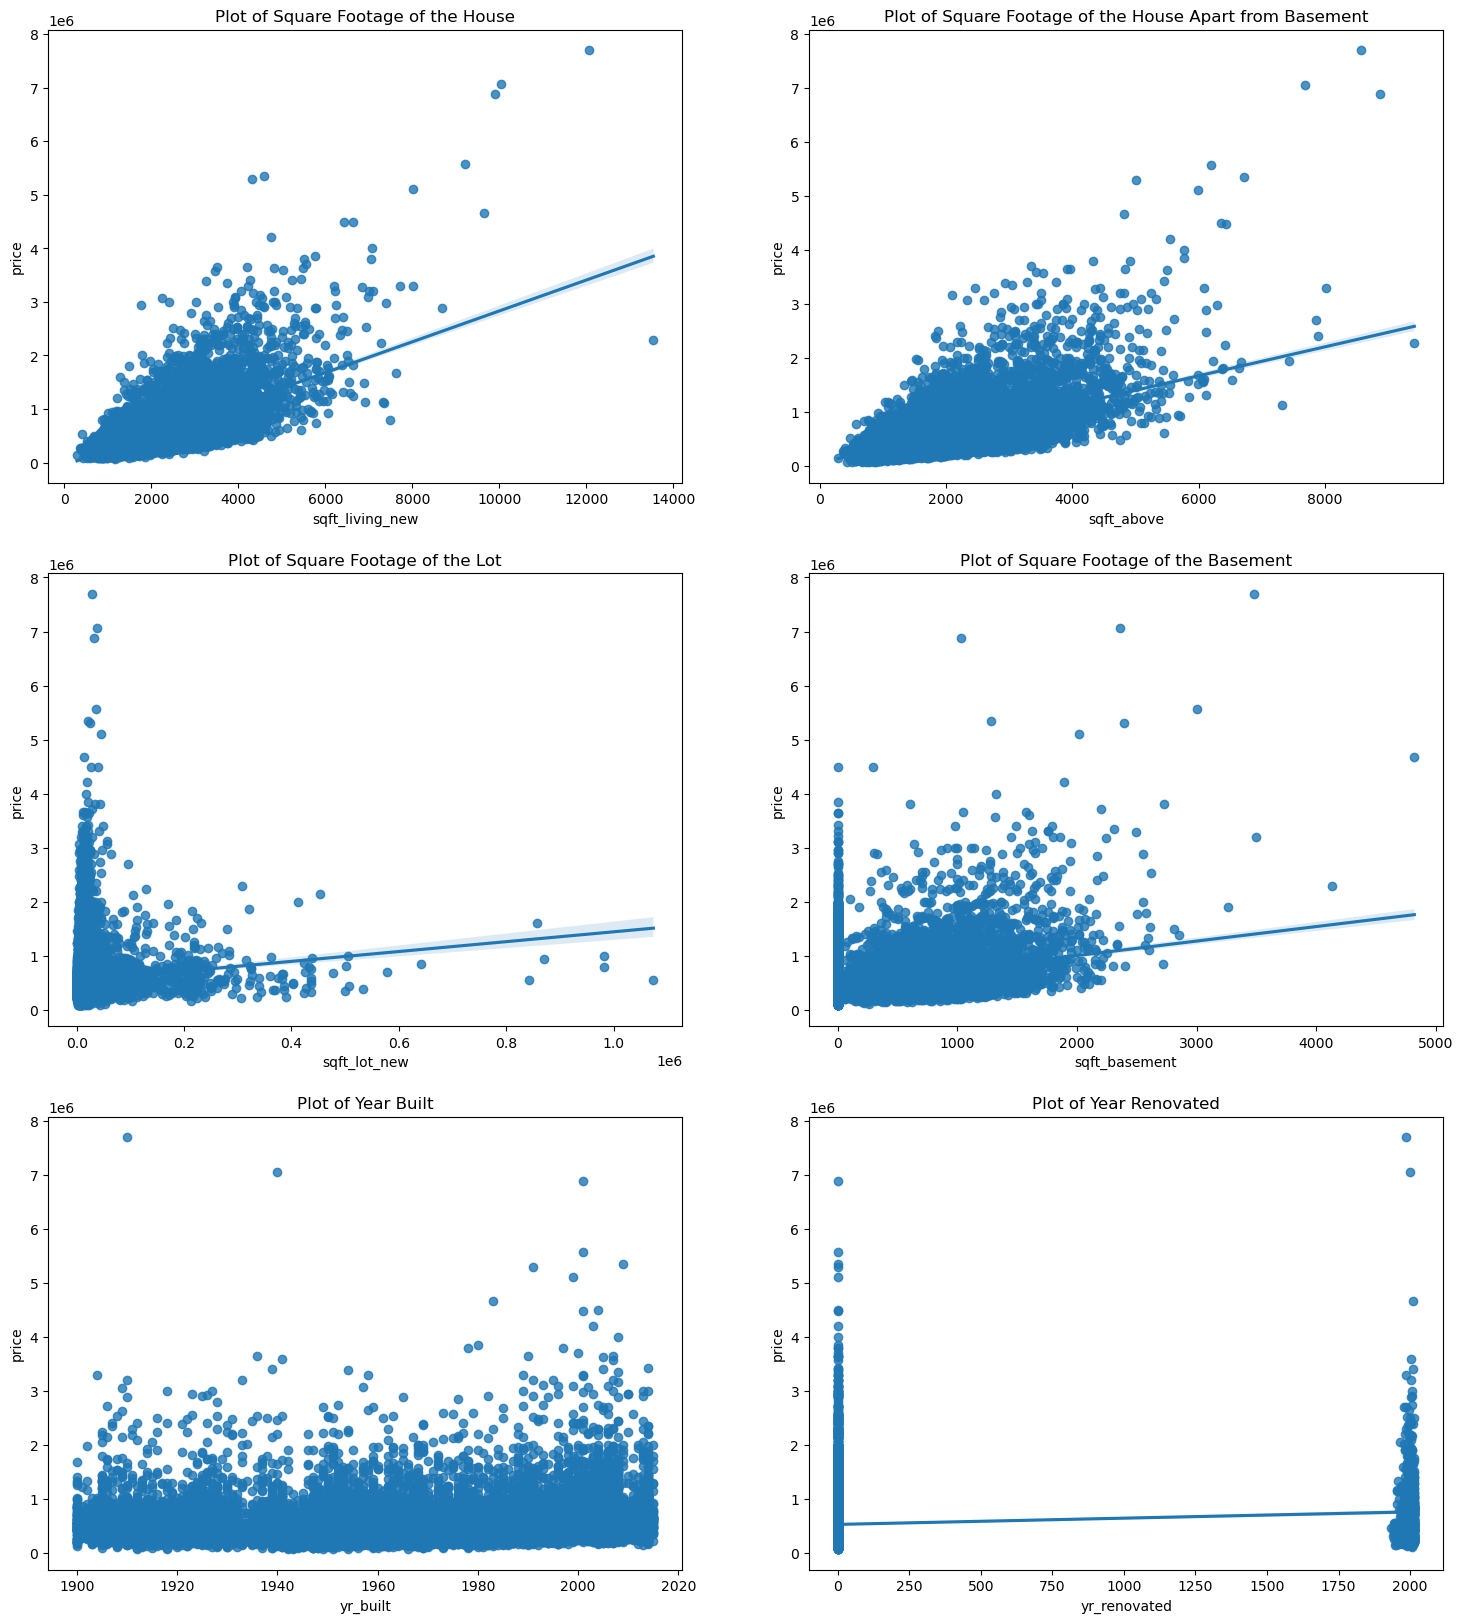

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(18, 20))
sns.regplot(x='sqft_living_new', y='price', data=df, ax=axs[0,0]).set_title('Plot of Square Footage of the House')
sns.regplot(x='sqft_above', y='price', data=df, ax=axs[0,1]).set_title('Plot of Square Footage of the House Apart from Basement')
sns.regplot(x='sqft_lot_new', y='price', data=df, ax=axs[1,0]).set_title('Plot of Square Footage of the Lot')
sns.regplot(x='sqft_basement', y='price', data=df, ax=axs[1,1]).set_title('Plot of Square Footage of the Basement')
sns.regplot(x='yr_built', y='price', data=df, ax=axs[2,0]).set_title('Plot of Year Built')
sns.regplot(x='yr_renovated', y='price', data=df, ax=axs[2,1]).set_title('Plot of Year Renovated')

Use the function <code>boxplot</code> in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.


Text(0.5, 1.0, 'Boxplot of the Waterfront')

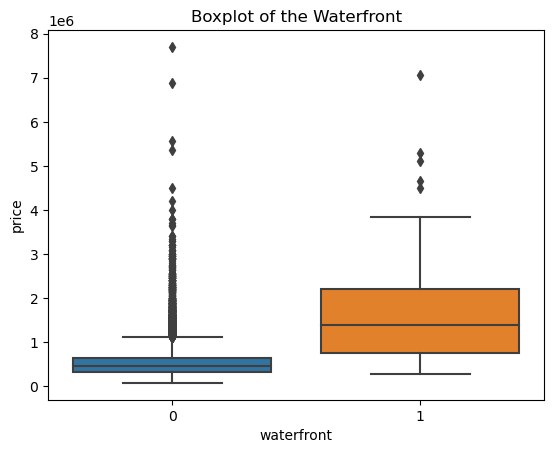

In [17]:
sns.boxplot(x='waterfront', y='price', data=df).set_title('Boxplot of the Waterfront')

There is shape differences between the two distributions.
A house with a waterfront view suggest a higher sell price, in general, than a house without a waterfront view.

Next we can plot the ordinal variables with <code>boxplot</code> too.

Text(0.5, 1.0, 'Boxplot of the View')

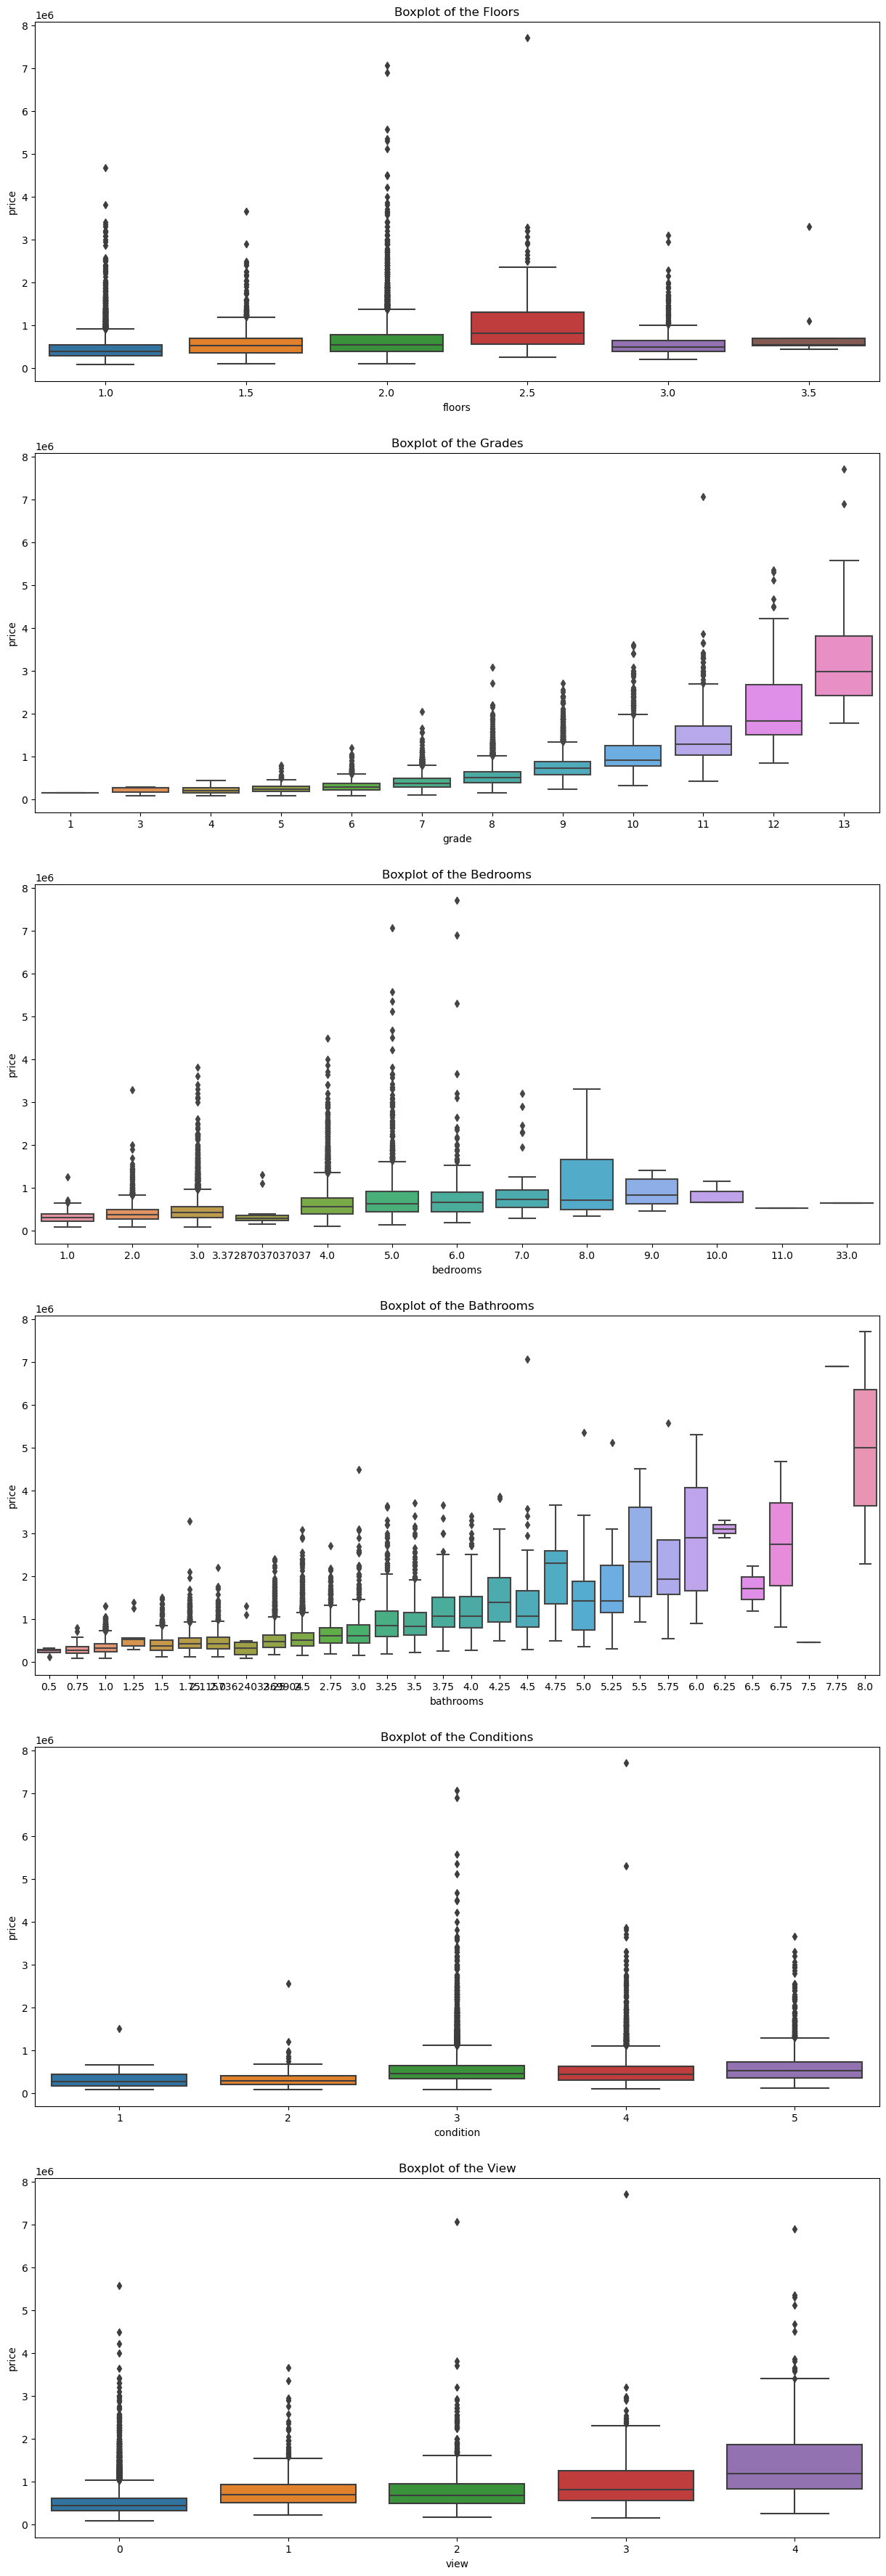

In [18]:
fig, axs = plt.subplots(nrows = 6, figsize=(15, 45))
sns.boxplot(x='floors', y='price', data=df, ax=axs[0]).set_title('Boxplot of the Floors')
sns.boxplot(x='grade', y='price', data=df, ax=axs[1]).set_title('Boxplot of the Grades')
sns.boxplot(x='bedrooms', y='price', data=df, ax=axs[2]).set_title('Boxplot of the Bedrooms')
sns.boxplot(x='bathrooms', y='price', data=df, ax=axs[3]).set_title('Boxplot of the Bathrooms')
sns.boxplot(x='condition', y='price', data=df, ax=axs[4]).set_title('Boxplot of the Conditions')
sns.boxplot(x='view', y='price', data=df, ax=axs[5]).set_title('Boxplot of the View')

We can check all the variables correlation with each other with the <code>corr()</code> method then we can plot it in a <code>heatmap</code>.

<Axes: >

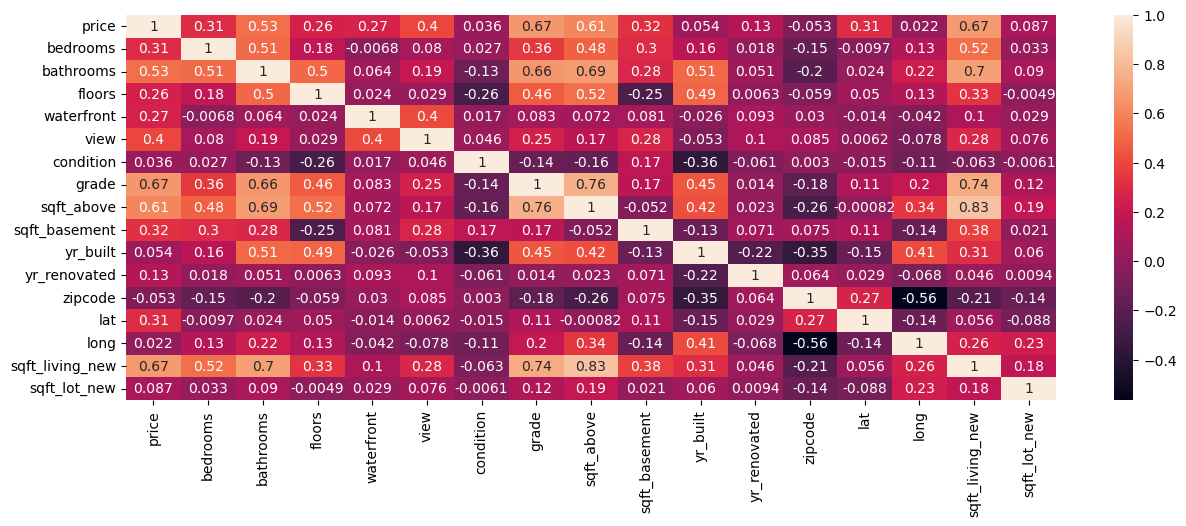

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), ax=ax, annot=True)

It seems like some of our independent variable is correlated to each other. For example <code>'sqft_living_new'</code> with <code>'sqft_above'</code> have a high correlation.

We also know that <code>'grade'</code> and <code>'sqft_living_new'</code> are probably our best indicator.

From the regplot we can see that <code>'sqft_basement'</code> has a lot of zero value which means that there are no basement in the house. We can check it with <code>.value_count()</code> method.

In [20]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

Seems like <code>'yr_renovates'</code> has a lot of zero value too which means that the house was not renovated at all.

In [21]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

I think it will be better if  we classify basement and renovation as dichotomous variables (e.g., 0 for no basement and no renovation, 1 for basement present and renovation happen)

In [22]:
for i in range(0,len(df)):
    if df.loc[i,'sqft_basement'] == 0:
        df.loc[i,'basement']=0
    else:
        df.loc[i,'basement']=1
df.drop(columns=['sqft_basement'],axis=1,inplace=True)

In [23]:
for i in range(0,len(df)):
    if df.loc[i,'yr_renovated'] == 0:
        df.loc[i,'renovated']=0
    else:
        df.loc[i,'renovated']=1
df.drop(columns=['yr_renovated'],axis=1,inplace=True)

As we know <code> zip code </code> is not really a quantitative variable so we need to change the zip codes into dummies and join them with the original data.

In [24]:
df = df.astype({'zipcode':'string'})

In [25]:
dummies=pd.get_dummies(df[['zipcode']],drop_first=True)
dummies

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df=df.join(dummies)
df.drop(columns=['zipcode'],axis=1,inplace=True)

In [27]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3.0,1.00,1.0,0,0,3,7,1180,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3.0,2.25,2.0,0,0,3,7,2170,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,1.0,0,0,3,6,770,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1.0,0,0,5,7,1050,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3.0,2.00,1.0,0,0,3,8,1680,1987,...,0,0,0,0,0,0,0,0,0,0


# 4. Modelling

Define the x and y for modelling.

In [28]:
x = df.drop(columns = ['price'], axis = 1)
y = df[['price']]

Split the data with <code>train_test_split</code> for training and testing.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print('x train data shape:', x_train.shape)
print('y train data shape:', y_train.shape)
print('x test data shape:', x_test.shape)
print('y test data shape:', y_test.shape)

x train data shape: (17290, 84)
y train data shape: (17290, 1)
x test data shape: (4323, 84)
y test data shape: (4323, 1)


## Linear Regression

Fit a linear regression model to predict the <code>'price'</code> using the train dataset.

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [31]:
coef = pd.DataFrame(lm.coef_[0], index=x_train.columns, columns=['coefficients'])
coef

,coefficients
bedrooms,-17240.871713
bathrooms,32275.758668
floors,-52827.704983
waterfront,613878.631867
view,59350.045527
...,...
zipcode_98177,135997.724729
zipcode_98178,15862.390715
zipcode_98188,15469.098151
zipcode_98198,-16170.135633


Some of the coefficients are pretty large. But that doesn't really mean they are more influential compared to the small coefficients. It is simply because our dataset has not been normalized and the data range for each of these columns vary widely.

Calculate the R^2, MAE, and MSE.

In [32]:
y_pred = lm.predict(x_test)
R2 = lm.score(x_test, y_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R-square score: ', R2)
print('Mean Absolute Error (MAE) : ', MAE)
print('Root Mean Squared Error (RMSE) : ', RMSE)

R-square score:  0.7733317309256964
Mean Absolute Error (MAE) :  101647.11274978306
Root Mean Squared Error (RMSE) :  197795.76171545687


## Linear Regression (Scaled Dataset)

In [33]:
x_train_scaled = pd.DataFrame(StandardScaler().fit_transform(x_train), columns = x_train.columns)
x_train_scaled.set_index(x_train.index, inplace = True)
x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(x_test), columns = x_test.columns)
x_test_scaled.set_index(x_test.index, inplace = True)

In [34]:
lm_scaled = LinearRegression()
lm_scaled.fit(x_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred_scaled = lm_scaled.predict(x_test_scaled)
R2_scaled = r2_score(y_test, y_pred_scaled)
MAE_scaled = metrics.mean_absolute_error(y_test, y_pred_scaled)
RMSE_scaled = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled))

print('R-square score (Scaled) : ', R2_scaled)
print('Mean Absolute Error (MAE) (Scaled) : ', MAE_scaled)
print('Root Mean Squared Error (RMSE) (Scaled) : ', RMSE_scaled)

R-square score (Scaled) :  0.7694818929671878
Mean Absolute Error (MAE) (Scaled) :  99994.10020020526
Root Mean Squared Error (RMSE) (Scaled) :  199468.41635379777


## Ridge Regression

In [36]:
RR = Ridge(alpha=0.1)
RR.fit(x_train, y_train)

Ridge(alpha=0.1)

In [37]:
y_pred_RR = RR.predict(x_test)
R2_RR = RR.score(x_test, y_test)
MAE_RR = metrics.mean_absolute_error(y_test, y_pred_RR)
RMSE_RR = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_RR))

print('R-square score (Ridge Regression): ', R2_RR)
print('Mean Absolute Error (MAE) (Ridge Regression) : ', MAE_RR)
print('Root Mean Squared Error (RMSE) (Ridge Regression) : ', RMSE_RR)

R-square score (Ridge Regression):  0.7733188402305204
Mean Absolute Error (MAE) (Ridge Regression) :  101649.29381925642
Root Mean Squared Error (RMSE) (Ridge Regression) :  197801.38598883204


# 6. Evaluation 1

In [38]:
evaluation_table1 = pd.DataFrame(columns=['Model','R2 Score','Mean Absolute Error (MAE)','Root Mean Squared Error (RMSE)'])
value = [{'Model':'Linear Regression','R2 Score':R2,'Mean Absolute Error (MAE)':MAE,'Root Mean Squared Error (RMSE)':RMSE},
        {'Model':'Linear Regression (Scaled)','R2 Score':R2_scaled,'Mean Absolute Error (MAE)':MAE_scaled,'Root Mean Squared Error (RMSE)':RMSE_scaled},
        {'Model':'Ridge Regression','R2 Score':R2_RR,'Mean Absolute Error (MAE)':MAE_RR,'Root Mean Squared Error (RMSE)':RMSE_RR}]
evaluation_table1 = evaluation_table1.append(value)
evaluation_table1['R2 Score'] = round(evaluation_table1['R2 Score'],5) 
evaluation_table1['Mean Absolute Error (MAE)'] = round(evaluation_table1['Mean Absolute Error (MAE)'],5) 
evaluation_table1['Root Mean Squared Error (RMSE)'] = round(evaluation_table1['Root Mean Squared Error (RMSE)'],5) 
evaluation_table1.sort_values('R2 Score', ascending=False)

,Model,R2 Score,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
0,Linear Regression,0.77333,101647.11275,197795.76172
2,Ridge Regression,0.77332,101649.29382,197801.38599
1,Linear Regression (Scaled),0.76948,99994.10020,199468.41635


From this table we know that the Linear Regression without scaled data is the best model for our data.

But, looking at the information from the EDA section, from the regplot we can assume that there is no linear relationship between our independent and dependent variables which means that a linear approach is probably not a good idea. To be sure wether we can use linear regression or not we can look at the linearity of our data and the normality of the residuals.

First let's create a dataframe that contains y_test, y_pred, and residual which can be obtain by substracting actual values with predicted values.

In [39]:
actual_value = y_test['price'].reset_index()
df_resid = pd.DataFrame(y_pred,columns=['prediction'])
df_resid = df_resid.join(actual_value['price'])
df_resid = df_resid.rename(columns={'price': 'actual'})

In [40]:
df_resid['residual'] = df_resid['actual'] - df_resid['prediction']

In [41]:
df_resid

,prediction,actual,residual
0,5.587303e+05,459000.0,-99730.253111
1,3.594852e+05,445000.0,85514.784791
2,6.997645e+05,1057000.0,357235.500619
3,6.620438e+05,732350.0,70306.201634
4,1.867468e+05,235000.0,48253.171900
...,...,...,...
4318,9.661417e+05,965000.0,-1141.670895
4319,3.938132e+05,359950.0,-33863.198817
4320,2.056146e+05,260000.0,54385.366411
4321,1.587192e+06,1795000.0,207807.651384


<code>Liniearity</code> assumes that there is a linear relationship between the independent variables and the dependent variable. But since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

Text(0, 0.5, 'Predicted Values')

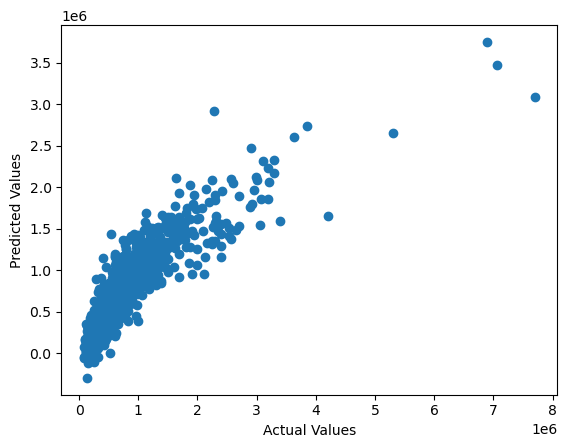

In [42]:
plt.scatter(x='actual', y='prediction', data=df_resid)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

The scatter plots show that the residual point are not evenly spread around the diagonal line, so we can assume that there is no linear relationship between our independent and dependent variables.

<code>Normality</code> assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the <code>Anderson-Darling test</code> and <code>Kolmogorov-Smirnov test</code> for normality. 

In [43]:
p_value = kstest(df_resid['residual'], 'norm')[1]
print('p-value from the test Kolmogorov-Smirnov test :', p_value)
if p_value < 0.05:
    print('P-value < 0.05, this means that the residuals are not normally distributed')
else:
    print('P-value > 0.05, this means that the residuals are normally distributed')

p-value from the test Kolmogorov-Smirnov test : 0.0
P-value < 0.05, this means that the residuals are not normally distributed


In [44]:
p_value = normal_ad(df_resid['residual'])[1]
print('p-value from the test Anderson-Darling test:', p_value)

if p_value < 0.05:
    print('P-value < 0.05, this means that the residuals are not normally distributed')
else:
    print('P-value > 0.05, this means that the residuals are normally distributed')

p-value from the test Anderson-Darling test: 0.0
P-value < 0.05, this means that the residuals are not normally distributed


C:\Users\Personal\anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


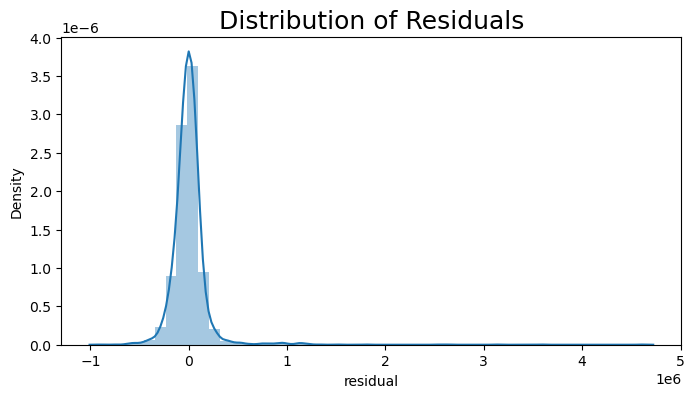

In [45]:
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_resid['residual'])
plt.show()

From these information it's safe to say that linar regression is not an approriate approach to our data.
For this case we should build a new model using Polynomial instead.

# 7. Modelling 2

## Linear Regression (Polynomial)

In [46]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [47]:
lm_poly = LinearRegression()
lm_poly.fit(x_train_poly, y_train)

LinearRegression()

In [48]:
y_pred_lm_poly = lm_poly.predict(x_test_poly)
R2_lm_poly = lm_poly.score(x_test_poly, y_test)
MAE_lm_poly = metrics.mean_absolute_error(y_test, y_pred_lm_poly)
RMSE_lm_poly = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_lm_poly))

print('R-square score (Linear Regression (Polynomial)): ', R2_lm_poly)
print('Mean Absolute Error (MAE) (Linear Regression (Polynomial)) : ', MAE_lm_poly)
print('Root Mean Squared Error (RMSE) (Linear Regression (Polynomial)) : ', RMSE_lm_poly)

R-square score (Linear Regression (Polynomial)):  0.7756631607141771
Mean Absolute Error (MAE) (Linear Regression (Polynomial)) :  83025.29242599198
Root Mean Squared Error (RMSE) (Linear Regression (Polynomial)) :  196775.90377667805


## Linear Regression (Polynomial and Scaled Data)

In [49]:
poly=PolynomialFeatures(degree=2)
x_train_poly_scaled=poly.fit_transform(x_train_scaled)
x_test_poly_scaled=poly.fit_transform(x_test_scaled)

In [50]:
lm_poly_scaled = LinearRegression()
lm_poly_scaled.fit(x_train_poly_scaled, y_train)

LinearRegression()

In [51]:
y_pred_lm_poly_scaled = lm_poly_scaled.predict(x_test_poly_scaled)
R2_lm_poly_scaled = r2_score(y_test, y_pred_lm_poly_scaled)
MAE_lm_poly_scaled = metrics.mean_absolute_error(y_test, y_pred_lm_poly_scaled)
RMSE_lm_poly_scaled = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_lm_poly_scaled))

print('R-square score (Linear Regression (Polynomial and Scaled)): ', R2_lm_poly_scaled)
print('Mean Absolute Error (MAE) (Linear Regression (Polynomial and Scaled)) : ', MAE_lm_poly_scaled)
print('Root Mean Squared Error (RMSE) (Linear Regression (Polynomial and Scaled)) : ', RMSE_lm_poly_scaled)

R-square score (Linear Regression (Polynomial and Scaled)):  -1.6579812783000737e+23
Mean Absolute Error (MAE) (Linear Regression (Polynomial and Scaled)) :  2.70567741033758e+16
Root Mean Squared Error (RMSE) (Linear Regression (Polynomial and Scaled)) :  1.6916535657387738e+17


## Ridge Regression (Polynomial)

In [52]:
RR_poly=Ridge(alpha=0.1)
RR_poly.fit(x_train_poly, y_train)

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.37008e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [53]:
y_pred_RR_poly = RR_poly.predict(x_test_poly)
R2_RR_poly = r2_score(y_test, y_pred_RR_poly)
MAE_RR_poly = metrics.mean_absolute_error(y_test, y_pred_RR_poly)
RMSE_RR_poly = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_RR_poly))

print('R-square score (Ridge Regression (Polynomial)): ', R2_RR_poly)
print('Mean Absolute Error (MAE) (Ridge Regression (Polynomial)) : ', MAE_RR_poly)
print('Root Mean Squared Error (RMSE) (Ridge Regression (Polynomial)) : ', RMSE_RR_poly)

R-square score (Ridge Regression (Polynomial)):  0.8967492638640057
Mean Absolute Error (MAE) (Ridge Regression (Polynomial)) :  73680.8161671936
Root Mean Squared Error (RMSE) (Ridge Regression (Polynomial)) :  133495.98241366848


## Ridge Regression (Polynomial and Scaled Dataset)

In [54]:
RR_poly_scaled=Ridge(alpha=0.1)
RR_poly_scaled.fit(x_train_poly_scaled, y_train)

Ridge(alpha=0.1)

In [55]:
y_pred_RR_poly_scaled = RR_poly_scaled.predict(x_test_poly_scaled)
R2_RR_poly_scaled = r2_score(y_test, y_pred_RR_poly_scaled)
MAE_RR_poly_scaled = metrics.mean_absolute_error(y_test, y_pred_RR_poly_scaled)
RMSE_RR_poly_scaled = numpy.sqrt(metrics.mean_squared_error(y_test, y_pred_RR_poly_scaled))

print('R-square score (Ridge Regression (Polynomial and Scaled)): ', R2_RR_poly_scaled)
print('Mean Absolute Error (MAE) (Ridge Regression (Polynomial and Scaled)) : ', MAE_RR_poly_scaled)
print('Root Mean Squared Error (RMSE) (Ridge Regression (Polynomial and Scaled)) : ', RMSE_RR_poly_scaled)

R-square score (Ridge Regression (Polynomial and Scaled)):  0.8569127647153939
Mean Absolute Error (MAE) (Ridge Regression (Polynomial and Scaled)) :  92932.25177944897
Root Mean Squared Error (RMSE) (Ridge Regression (Polynomial and Scaled)) :  157152.77839606517


# 8. Evaluation 2

Linear Regression (Polynomial and Scaled) model R2 score is negative. R2 will be negative whenever the model’s predictions are worse than a constant function that always predicts the mean of the data. It means that the chosen model (with its constraints) fits the data really poorly. So we can just drop this model.

In [56]:
evaluation_table2 = pd.DataFrame(columns=['Model','R2 Score','Mean Absolute Error (MAE)','Root Mean Squared Error (RMSE)'])
value = [{'Model':'Linear Regression (Polynomial)','R2 Score':R2_lm_poly,'Mean Absolute Error (MAE)':MAE_lm_poly,'Root Mean Squared Error (RMSE)':RMSE_lm_poly},
        {'Model':'Ridge Regression (Polynomial)','R2 Score':R2_RR_poly,'Mean Absolute Error (MAE)':MAE_RR_poly,'Root Mean Squared Error (RMSE)':RMSE_RR_poly},
        {'Model':'Ridge Regression (Polynomial and Scaled)','R2 Score':R2_RR_poly_scaled,'Mean Absolute Error (MAE)':MAE_RR_poly_scaled,'Root Mean Squared Error (RMSE)':RMSE_RR_poly_scaled}]
evaluation_table2 = evaluation_table2.append(value)
evaluation_table2['R2 Score'] = round(evaluation_table2['R2 Score'],5) 
evaluation_table2['Mean Absolute Error (MAE)'] = round(evaluation_table2['Mean Absolute Error (MAE)'],5) 
evaluation_table2['Root Mean Squared Error (RMSE)'] = round(evaluation_table2['Root Mean Squared Error (RMSE)'],5) 
evaluation_table2.sort_values('R2 Score', ascending=False)

,Model,R2 Score,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
1,Ridge Regression (Polynomial),0.89675,73680.81617,133495.98241
2,Ridge Regression (Polynomial and Scaled),0.85691,92932.25178,157152.77840
0,Linear Regression (Polynomial),0.77566,83025.29243,196775.90378


From this table we know that Ridge Regression (Polynomial) is the best model for predicting house prices. This make sense because if we look at the correlation heatmap, it seems that there is multicollinearity in our data. Ridge Regression is great for this kind of case because it is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

Here are coefficient of the best model a.k.a Ridge Regression (Polynomial):

In [57]:
coef_ridge_poly = pd.DataFrame(RR_poly.coef_[0], columns=['coefficients'])
coef_ridge_poly

,coefficients
0,0.000000
1,-5764.410407
2,4087.643086
3,37691.314447
4,-3033.490079
...,...
3650,0.000000
3651,0.000000
3652,-1437.732355
3653,0.000000


# 9. Conclusion

By comparing all of these models, we conclude that the <b>Ridge Regression with Polynomial Features</b> is the best model to predict house price from our dataset with:
1. R2 Score : 0.8932596152601109
2. Mean Absolute Error (MAE) : 74988.75916333811
3. Root Mean Squared Error (RMSE) : 135733.1722841174

This result makes sense since we have a lot variables in total and we know that some of them are highly correlated to each other and our data are not linear.